# Chapter 4: Color Image Processing

This is the companion file for Chapter 4.

## **Video 4.1**
**The Physics and Psychology of Color**

[![The Physics and Psychology of Colour - Andrew Hanson](https://img.youtube.com/vi/af78RPi6ayE/0.jpg)](https://www.youtube.com/watch?v=af78RPi6ayE)

*Video: The Physics and Psychology of Colour - Andrew Hanson.*


## **Video 4.2**
**What is Color?**

[![What is color? - Khan Academy](https://img.youtube.com/vi/0DXZvcfPVrk/0.jpg)](https://www.youtube.com/watch?v=0DXZvcfPVrk)

*Video: “What is color?” from Khan Academy.*



## **Video 4.3?**
**Color Spectrum**

[![Color Spectrum](https://img.youtube.com/vi/0vJOkO43KI4/0.jpg)](https://www.youtube.com/watch?v=0vJOkO43KI4)

*Video: Color Spectrum.*


## **Video 4.4**
**How does the brain generate color?**

[![How does the brain generate color?](https://img.youtube.com/vi/l8_fZPHasdo/0.jpg)](https://www.youtube.com/watch?v=l8_fZPHasdo)

*Video: How does the brain generate color?*


## **Programming exercise 4.1:**

1.   Run the following code to see red, green, and blue channel representations of the sample image.
2.   Observe the effect of adding (and subtracting) and image to (from) itself after a slight shift.

(-0.5, 1426.5, 738.5, -0.5)

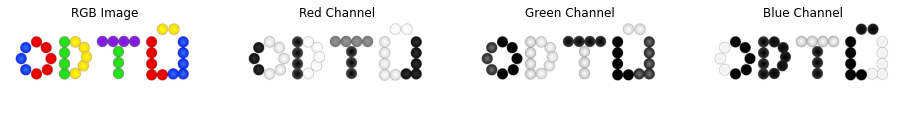

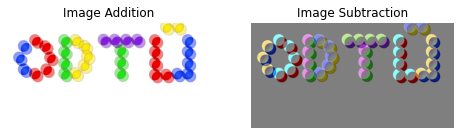

In [4]:
# Import necessary libraries for image processing and visualization
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

# Download the image from the specified URL
url = "https://raw.githubusercontent.com/itironal/466Companion/main/images/odtu.jpg"
urllib.request.urlretrieve(url, "images/odtu.jpg")

# Read the downloaded image using skimage's io module
img1 = io.imread("images/odtu.jpg") 

# Create a blank image of the same shape as img1, filled with white (255)
img2 = 255 * np.ones((img1.shape[0], img1.shape[1], img1.shape[2])).astype('int')

# Place img1 shifted by 20 pixels down and to the right into img2, leaving a border
img2[0:-20, 0:-20, :] = img1[20:, 20:, :]

# Visualize different channels of an image
plt.figure(figsize=(16, 6))

# Display the original RGB image
plt.subplot(141)
plt.imshow(img1)
plt.title('RGB Image')
plt.axis('off')

# Display the Red channel of the image
plt.subplot(142)
plt.imshow(img1[:, :, 0], cmap='gray')
plt.title('Red Channel')
plt.axis('off')

# Display the Green channel of the image
plt.subplot(143)
plt.imshow(img1[:, :, 1], cmap='gray')
plt.title('Green Channel')
plt.axis('off')

# Display the Blue channel of the image
plt.subplot(144)
plt.imshow(img1[:, :, 2], cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

# Create a new figure for image addition and subtraction
plt.figure(figsize=(8, 6))

# Image addition: combine img1 and img2
img3 = img1.astype(float) + img2.astype(float)
# Normalize the result to the range [0, 1]
img3 = (img3 - img3.min()) / (img3.max() - img3.min())

# Display the result of image addition
plt.subplot(1, 2, 1)
plt.imshow((img3 * 255).astype(np.uint8))  # Convert back to uint8 for display
plt.title('Image Addition')
plt.axis('off')

# Image subtraction: subtract img2 from img1
img3 = img1.astype(float) - img2.astype(float)
# Normalize the result to the range [0, 1]
img3 = (img3 - img3.min()) / (img3.max() - img3.min())

# Display the result of image subtraction
plt.subplot(1, 2, 2)
plt.imshow(img3)
plt.title('Image Subtraction')
plt.axis('off')


## **Programming exercise 4.2:**

1.   Run the following code to see hue, saturation, and intensity channels of the sample image.

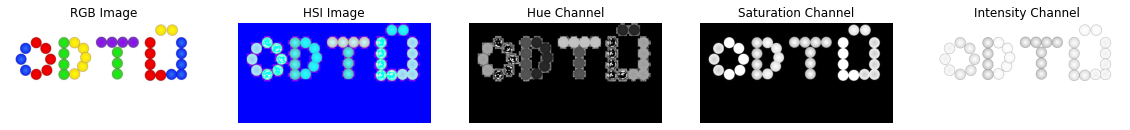

In [5]:
# Convert RGB image to HSI image and visualize hue, saturation, intensity channels
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np

# Download the image from the specified URL
url = "https://raw.githubusercontent.com/itironal/466Companion/main/images/odtu.jpg"
urllib.request.urlretrieve(url, "images/odtu.jpg")

# Read the downloaded image using skimage's io module
img1 = io.imread("images/odtu.jpg") 
img_hsi = color.rgb2hsv(img1)

plt.figure(figsize=(20,8))

plt.subplot(151)
plt.imshow(img1)
plt.title('RGB Image');
plt.axis('off');

plt.subplot(152)
plt.imshow(img_hsi)
plt.title('HSI Image');
plt.axis('off');

plt.subplot(153)
plt.imshow(img_hsi[:,:,0],cmap='gray');
plt.title('Hue Channel');
plt.axis('off');

plt.subplot(154)
plt.imshow(img_hsi[:,:,1],cmap='gray');
plt.title('Saturation Channel');
plt.axis('off');

plt.subplot(155)
plt.imshow(img_hsi[:,:,2],cmap='gray');
plt.title('Intensity Channel');
plt.axis('off');

## **Programming exercise 4.3:**

1.   Run the following code to perform pseudocoloring.

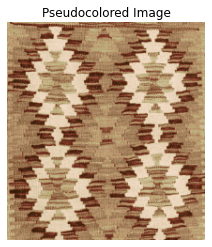

In [6]:
#Pseudocoloring code

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Download the images from the specified URL
url = "https://raw.githubusercontent.com/itironal/466Companion/main/images/cropped_kilim_image.png"
urllib.request.urlretrieve(url, "images/cropped_kilim_image.png")

# --- FILE NAMES ---
gray_image_filename = "images/cropped_kilim_image.png"    # grayscale input
color_image_filename = "images/redmushroom_long.png"  # color source image

# --- READ IMAGES ---
gray_img = cv2.imread(gray_image_filename, cv2.IMREAD_GRAYSCALE)
color_img_bgr = cv2.imread(color_image_filename)

if gray_img is None or color_img_bgr is None:
    raise FileNotFoundError("Could not load input images.")

# Convert color image from BGR to RGB
color_img = cv2.cvtColor(color_img_bgr, cv2.COLOR_BGR2RGB)

# --- CREATE PALETTE USING LUMINANCE ---
weights = np.array([0.2989, 0.5870, 0.1140])  # luminance weights for RGB

palette = np.zeros((256, 3), dtype=np.float32)
counts = np.zeros(256, dtype=np.int32)

# Calculate luminance per pixel and accumulate colors
luminance_img = (color_img @ weights).astype(np.uint8)  # shape (H,W)

for i in range(color_img.shape[0]):
    for j in range(color_img.shape[1]):
        lum = luminance_img[i, j]
        palette[lum] += color_img[i, j]
        counts[lum] += 1

# Average accumulated colors for each luminance value
for i in range(256):
    if counts[i] > 0:
        palette[i] /= counts[i]

# --- FILL MISSING PALETTE ENTRIES BY LINEAR INTERPOLATION ---
def fill_palette(palette):
    filled = palette.copy()
    known_indices = np.where(np.any(palette != 0, axis=1))[0]

    # Fill start to first known
    filled[:known_indices[0]] = palette[known_indices[0]]

    # Fill between known points
    for k in range(len(known_indices) - 1):
        start, end = known_indices[k], known_indices[k+1]
        for idx in range(start+1, end):
            ratio = (idx - start) / (end - start)
            filled[idx] = (1 - ratio) * palette[start] + ratio * palette[end]

    # Fill last known to end
    filled[known_indices[-1]:] = palette[known_indices[-1]]

    return filled

palette_filled = fill_palette(palette)


# --- APPLY PALETTE TO GRAYSCALE IMAGE ---
h, w = gray_img.shape
colored_img = np.zeros((h, w, 3), dtype=np.uint8)

for i in range(h):
    for j in range(w):
        val = gray_img[i, j]
        colored_img[i, j] = np.clip(palette_filled[val], 0, 255)

plt.imshow(colored_img)
plt.axis('off')  # Hide axis
plt.title("Pseudocolored Image")
plt.show()
